In [1]:
import pandas as pd 

In [2]:
main = pd.read_csv("malicious_phish.csv")
main

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [3]:
import pandas as pd

# Define a list of file paths and corresponding types
file_paths = [
    ("FinalDataset/URL/Benign_list_big_final.csv", "benign"),
    ("FinalDataset/URL/DefacementSitesURLFiltered.csv", "defacement"),
    ("FinalDataset/URL/Malware_dataset.csv", "malware"),
    ("FinalDataset/URL/phishing_dataset.csv", "phishing"),
    ("FinalDataset/URL/spam_dataset.csv", "spam")
]

# Initialize an empty list to store dataframes
dfs = []

# Iterate through the file paths and types
for file_path, url_type in file_paths:
    # Read the CSV file
    df = pd.read_csv(file_path, header=None)
    # Assign column names
    df.columns = ["url"]
    # Add a column for the URL type
    df["type"] = url_type
    # Append the dataframe to the list
    dfs.append(df)

dfs.append(main)
# Concatenate the list of dataframes into a single dataframe
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.drop_duplicates(inplace=True)
merged_df.reset_index(drop=True, inplace=True)

# Display the merged dataframe
merged_df.head(100000)

,url,type
0,http://1337x.to/torrent/1048648/American-Snipe...,benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign
...,...,...
99995,http://www.ccent.com.au/index.php?view=article...,defacement
99996,http://www.ccent.com.au/index.php?option=com_c...,defacement
99997,http://www.ccent.com.au/index.php?option=com_m...,defacement
99998,http://www.ccent.com.au/index.php?view=article...,defacement


preprocessing:

Missing values in each column:
 url     0
type    0
dtype: int64
Class distribution after SMOTE: Counter({0: 428080, 1: 428080, 2: 428080, 3: 428080, 4: 428080})
Descriptive statistics:
          url_length  type_encoded
count  2.140400e+06  2.140400e+06
mean   7.267493e+01  2.000000e+00
std    8.571631e+01  1.414214e+00
min    1.000000e+00  0.000000e+00
25%    3.400000e+01  1.000000e+00
50%    5.200000e+01  2.000000e+00
75%    8.600000e+01  3.000000e+00
max    2.175000e+03  4.000000e+00


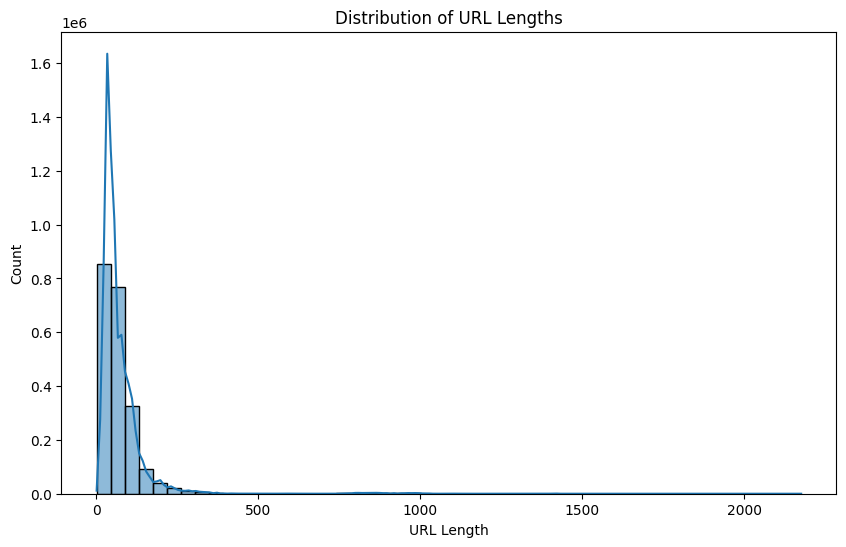

/tmp/ipykernel_30849/464928990.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=balanced_df["type_encoded"], palette="viridis")


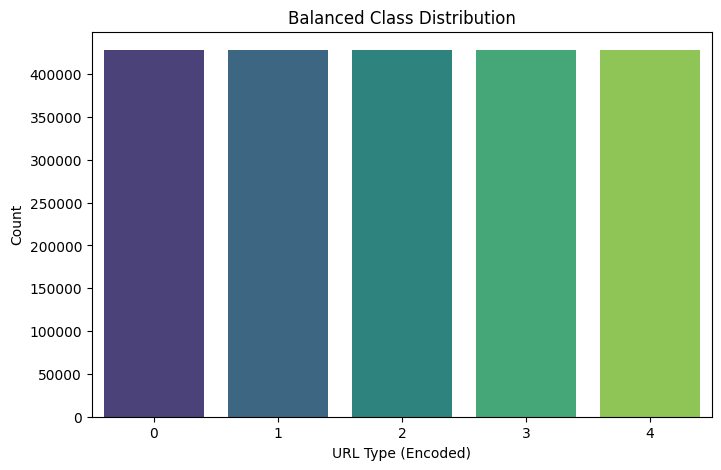

/tmp/ipykernel_30849/464928990.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=balanced_df["type_encoded"], y=balanced_df["url_length"], palette="coolwarm")


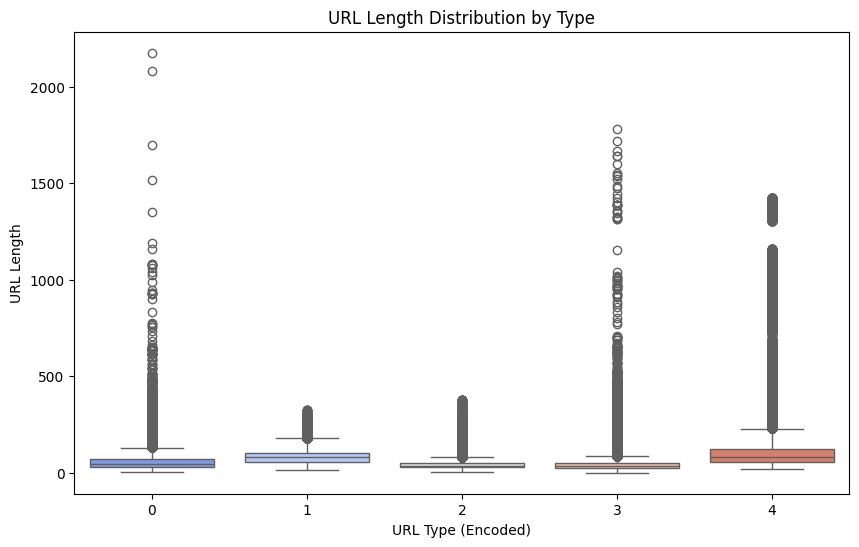

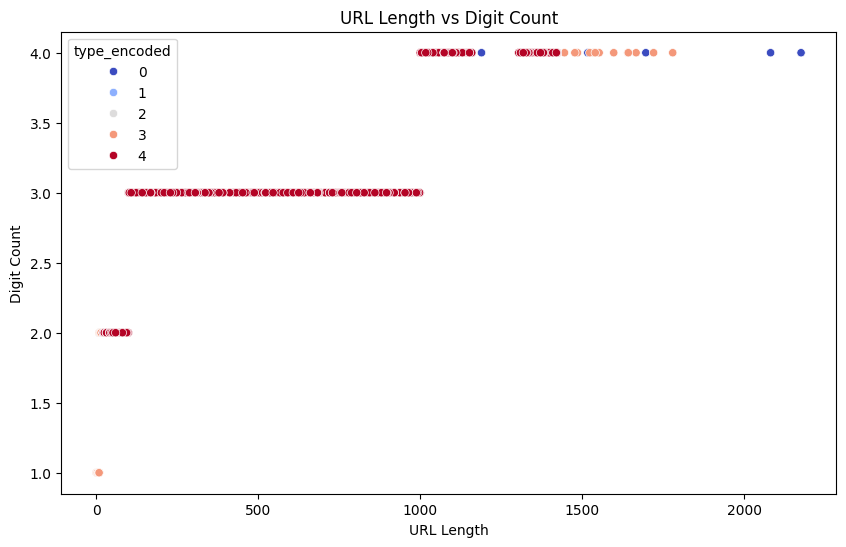

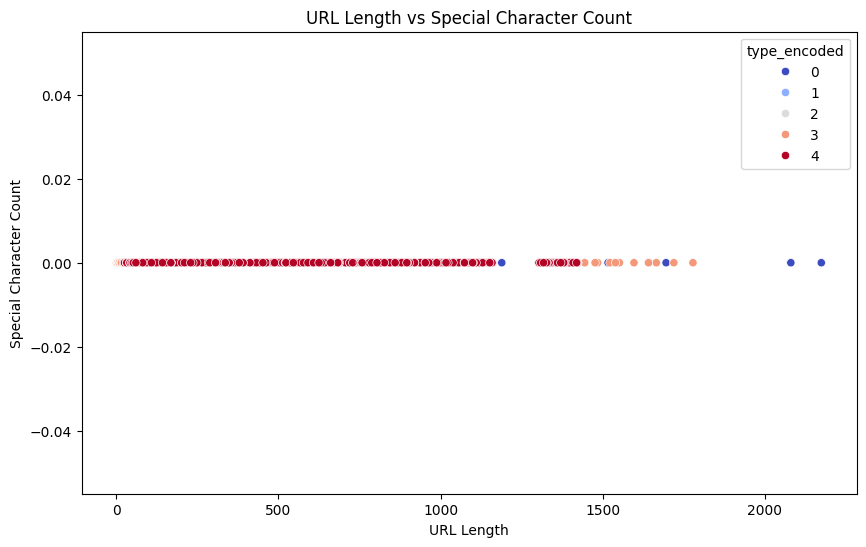

/tmp/ipykernel_30849/464928990.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_digits.index, y=avg_digits.values, palette="viridis")


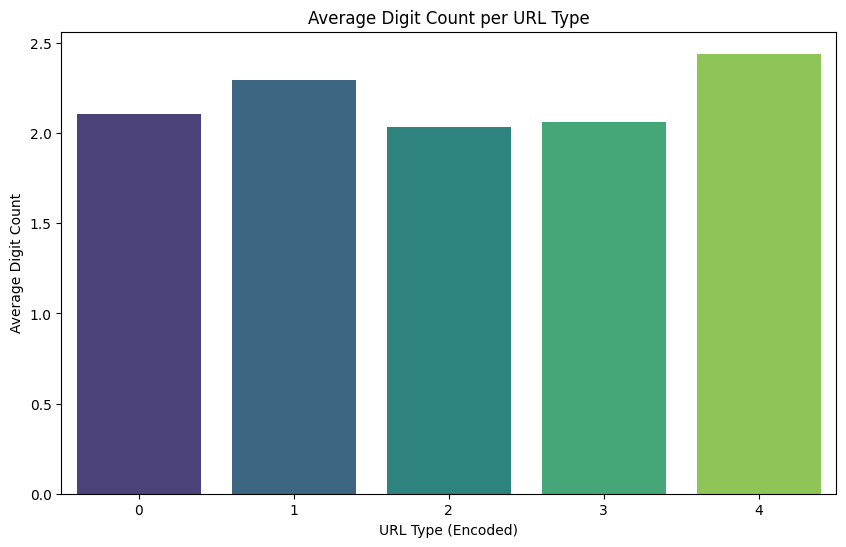

TF-IDF Feature Matrix Shape: (653040, 5023242)
   url_length  type_encoded  digit_count  special_char_count
0          83             0            2                   0
1          83             0            2                   0
2          83             0            2                   0
3          83             0            2                   0
4          83             0            2                   0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import re

# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values (if any)
merged_df.dropna(inplace=True)

# Remove duplicate URLs (already done, but ensuring again)
merged_df.drop_duplicates(subset=["url"], inplace=True)

# Remove any leading/trailing whitespaces from URLs
merged_df["url"] = merged_df["url"].str.strip()

# Encode the 'type' column for ML models
label_encoder = LabelEncoder()
merged_df["type_encoded"] = label_encoder.fit_transform(merged_df["type"])

# Address class imbalance using SMOTE
X = merged_df["url"]  # Feature
y = merged_df["type_encoded"]  # Target

# Convert URLs to numerical representation (e.g., length of URL as a simple feature)
X_features = X.apply(len).values.reshape(-1, 1)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_features, y)

# Create a balanced dataframe
balanced_df = pd.DataFrame({"url_length": X_resampled.flatten(), "type_encoded": y_resampled})

# Display class distribution after balancing
print("Class distribution after SMOTE:", Counter(y_resampled))

# Exploratory Data Analysis (EDA)
# Descriptive statistics
print("Descriptive statistics:\n", balanced_df.describe())

# Visualize data distribution
plt.figure(figsize=(10, 6))
sns.histplot(balanced_df["url_length"], bins=50, kde=True)
plt.title("Distribution of URL Lengths")
plt.xlabel("URL Length")
plt.ylabel("Count")
plt.show()

# Class distribution visualization
plt.figure(figsize=(8, 5))
sns.countplot(x=balanced_df["type_encoded"], palette="viridis")
plt.title("Balanced Class Distribution")
plt.xlabel("URL Type (Encoded)")
plt.ylabel("Count")
plt.show()

# Extract URL features
balanced_df["digit_count"] = pd.Series(X_resampled.flatten()).astype(str).apply(lambda x: sum(c.isdigit() for c in x))
balanced_df["special_char_count"] = pd.Series(X_resampled.flatten()).astype(str).apply(lambda x: sum(not c.isalnum() for c in x))

# Relationship between URL length and type
plt.figure(figsize=(10, 6))
sns.boxplot(x=balanced_df["type_encoded"], y=balanced_df["url_length"], palette="coolwarm")
plt.title("URL Length Distribution by Type")
plt.xlabel("URL Type (Encoded)")
plt.ylabel("URL Length")
plt.show()

# Additional graphs for insights
# 1. Scatter plot of URL length vs digit count
plt.figure(figsize=(10, 6))
sns.scatterplot(x=balanced_df["url_length"], y=balanced_df["digit_count"], hue=balanced_df["type_encoded"], palette="coolwarm")
plt.title("URL Length vs Digit Count")
plt.xlabel("URL Length")
plt.ylabel("Digit Count")
plt.show()

# 2. Special characters count vs URL length
plt.figure(figsize=(10, 6))
sns.scatterplot(x=balanced_df["url_length"], y=balanced_df["special_char_count"], hue=balanced_df["type_encoded"], palette="coolwarm")
plt.title("URL Length vs Special Character Count")
plt.xlabel("URL Length")
plt.ylabel("Special Character Count")
plt.show()

# 3. Bar plot of average digit count per URL type
plt.figure(figsize=(10, 6))
avg_digits = balanced_df.groupby("type_encoded")["digit_count"].mean()
sns.barplot(x=avg_digits.index, y=avg_digits.values, palette="viridis")
plt.title("Average Digit Count per URL Type")
plt.xlabel("URL Type (Encoded)")
plt.ylabel("Average Digit Count")
plt.show()

# NLP Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 5))
X_tfidf = tfidf_vectorizer.fit_transform(X)
print("TF-IDF Feature Matrix Shape:", X_tfidf.shape)

# Display the preprocessed and balanced data
print(balanced_df.head())


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

Model Trainings

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Dense, GlobalMaxPooling1D
from transformers import BertTokenizer, TFBertForSequenceClassification
import numpy as np


2025-03-27 22:03:32.911817: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-27 22:03:32.919596: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743095012.927789   30849 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743095012.930235   30849 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743095012.936861   30849 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [6]:
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 141558581 stored elements and shape (653040, 5023242)>

In [7]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((522432, 5023242), (130608, 5023242), (522432,), (130608,))

In [ ]:

# LLM-based Approach (BERT)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
X_train_texts = [str(url) for url in X_train]
X_test_texts = [str(url) for url in X_test]
X_train_encodings = tokenizer(X_train_texts, truncation=True, padding=True, max_length=128, return_tensors="tf")
X_test_encodings = tokenizer(X_test_texts, truncation=True, padding=True, max_length=128, return_tensors="tf")

bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(set(y)))
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])
bert_model.fit(dict(X_train_encodings), y_train, epochs=3, batch_size=8, validation_data=(dict(X_test_encodings), y_test))

In [ ]:



# Traditional ML Models
rf = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7430938380497366
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     85757
           1       0.99      0.53      0.69     18929
           2       1.00      0.12      0.21      4672
           3       1.00      0.03      0.07     18924
           4       1.00      0.03      0.06      2326

    accuracy                           0.74    130608
   macro avg       0.94      0.34      0.37    130608
weighted avg       0.81      0.74      0.67    130608



In [ ]:

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
